In [ ]:
from PIL import Image
import numpy as np

# Define function to calculate pixel-wise difference
def pixel_diff(image1, image2):
  """
  Calculates the pixel-wise difference between two images.

  Args:
    image1: A PIL Image object of the first image.
    image2: A PIL Image object of the second image.

  Returns:
    A NumPy array containing the absolute difference for each pixel.
  """
  image1_arr = np.asarray(image1)
  image2_arr = np.asarray(image2)
  diff_arr = np.abs(image1_arr - image2_arr)
  return diff_arr

# Load images
image1 = Image.open('/content/lulc_bengaluru_2014_2.tiff')
image2 = Image.open('/content/lulc_bengaluru_2016_2.tif')

# Convert images to grayscale for simpler comparison
image1_gray = image1.convert("L")
image2_gray = image2.convert("L")

# Calculate pixel-wise difference
diff_arr = pixel_diff(image1_gray, image2_gray)

# Calculate total number of pixels and changed pixels
total_pixels = image1_gray.size[0] * image1_gray.size[1]
changed_pixels = np.count_nonzero(diff_arr)

# Calculate percentage change
percent_change = (changed_pixels / total_pixels) * 100

# Print results
print(f"Percentage change between images: {percent_change:.2f}%")

# (Optional) Visualize the difference image
# ...
# Set a threshold for highlighting significant differences
threshold = 20

# Apply threshold to the difference image
diff_mask = np.where(diff_arr > threshold, 255, 0)

# Convert the binary mask to a grayscale image
diff_image = Image.fromarray(diff_mask, mode="L")

# (Optional) Colorize the difference image
# ...
# (Optional) Colorize the difference image
color_map = {
    0: (0, 0, 0),    # Black for no difference
    20: (0, 255, 0),  # Green for small changes
    50: (255, 255, 0),  # Yellow for medium changes
    100: (255, 0, 0)  # Red for large changes
}

# Create a new RGB image with the same size as the difference image
diff_image_rgb = Image.new("RGB", diff_image.size)

# Loop through each pixel in the difference image and apply the color map
for x in range(diff_image.size[0]):
    for y in range(diff_image.size[1]):
        pixel_value = diff_arr[y, x]  # Get the pixel value from the NumPy array
        for threshold, color in color_map.items():
            if pixel_value >= threshold:
                diff_image_rgb.putpixel((x, y), color)
                break

# Save the colorized difference image
diff_image_rgb.save("colorized_diff_image.png")

# Save or display the difference image
diff_image.save("diff_image.png")

# Optionally, you can:
# * Apply color coding to highlight different levels of difference
# * Overlay the mask on the original image for better context
# * Use libraries like OpenCV for more advanced visualization techniques




Percentage change between images: 18.87%


In [ ]:
from PIL import Image
import numpy as np

# Define function to calculate channel-wise difference
def channel_diff(image1, image2):
  """
  Calculates the pixel-wise difference for each channel in two images.

  Args:
    image1: A PIL Image object of the first image.
    image2: A PIL Image object of the second image.

  Returns:
    A tuple of NumPy arrays containing the absolute difference for each channel.
  """
  image1_arr = np.asarray(image1)
  image2_arr = np.asarray(image2)
  diff_red = np.abs(image1_arr[..., 0] - image2_arr[..., 0])
  diff_green = np.abs(image1_arr[..., 1] - image2_arr[..., 1])
  diff_blue = np.abs(image1_arr[..., 2] - image2_arr[..., 2])
  return diff_red, diff_green, diff_blue

# Load images
image1 = Image.open('/content/lulc_bengaluru_2014_2.tiff')
image2 = Image.open('/content/lulc_bengaluru_2016_2.tif')


# Calculate channel-wise differences
diff_red, diff_green, diff_blue = channel_diff(image1, image2)

# Calculate total number of pixels and changed pixels for each channel
total_pixels = image1.size[0] * image1.size[1]
changed_pixels_red = np.count_nonzero(diff_red)
changed_pixels_green = np.count_nonzero(diff_green)
changed_pixels_blue = np.count_nonzero(diff_blue)

# Calculate and print percentage change for each channel
print(f"Red channel change: {changed_pixels_red / total_pixels * 100:.2f}%")
print(f"Green channel change: {changed_pixels_green / total_pixels * 100:.2f}%")
print(f"Blue channel change: {changed_pixels_blue / total_pixels * 100:.2f}%")

# (Optional) Visualize the channel-wise differences
# ...



Red channel change: 8.76%
Green channel change: 18.75%
Blue channel change: 0.77%


In [ ]:
from PIL import Image
import numpy as np
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

# Load images
image1 = Image.open('/content/lulc_bengaluru_2014_2.tiff')
image2 = Image.open('/content/lulc_bengaluru_2016_2.tif')

# Convert images to arrays
array1 = np.array(image1)
array2 = np.array(image2)

# Convert arrays to grayscale for simpler comparison
array1_gray = np.mean(array1, axis=2, dtype=np.uint8)
array2_gray = np.mean(array2, axis=2, dtype=np.uint8)

# Calculate Mean Squared Error (MSE)
mse_value = mse(array1_gray, array2_gray)

# Calculate Structural Similarity Index (SSIM)
ssim_value, diff_image = ssim(array1_gray, array2_gray, full=True)

# Calculate percentage change based on MSE (assuming max MSE = 255^2)
percent_change_mse = (mse_value / (255**2)) * 100

# Print results
print(f"MSE between images: {mse_value:.4f}")
print(f"SSIM between images: {ssim_value:.4f}")
print(f"Percentage change based on MSE: {percent_change_mse:.2f}%")


MSE between images: 247.4377
SSIM between images: 0.7155
Percentage change based on MSE: 0.38%


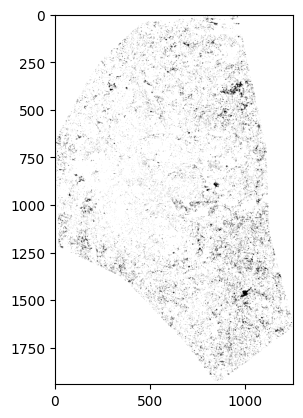

In [ ]:
!pip install rasterio
import rasterio
import numpy as np
import matplotlib.pyplot as plt

def image_difference(image1_path, image2_path, threshold=220):
    # Read the two images
    with rasterio.open(image1_path) as src1, rasterio.open(image2_path) as src2:
        image1 = src1.read(1)
        image2 = src2.read(1)
        transform = src1.transform  # Assuming both images have the same transform

    # Calculate the absolute difference between the two images
    diff = np.abs(image1 - image2)

    # Classify pixels based on the threshold
    changed_mask = (diff > threshold)

    # Create a new image with black for changed pixels and white for unchanged pixels
    output_image = np.where(changed_mask, 0, 255).astype(np.uint8)

    # Save or display the resulting image
    with rasterio.open('difference_result.tif', 'w', driver='GTiff', height=output_image.shape[0],
                       width=output_image.shape[1], count=1, dtype=np.uint8, crs=src1.crs, transform=transform) as dst:
        dst.write(output_image, 1)

    plt.imshow(output_image, cmap='gray')
    plt.show()

# Example usage
image1_path = 'lulc_bengaluru_2014_2.tiff'
image2_path = 'lulc_bengaluru_2016_2.tif'
image_difference(image1_path, image2_path, threshold=220)
